In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
%run scripts/helper.py

In [39]:
# load data
dfsurvey = pd.read_csv('./data/train_FBFog7d.csv')
dfsurvey.head()

,ID,Var1,WorkStatus,Score,Divorce,Widowed,Education,Residence_Region,babies,preteen,teens,income,Engagement_Religion,Var2,TVhours,Gender,Unemployed10,Happy
0,10000123,A,keeping house,46,NaN,no,12,middle atlantic,2,3,0,$10000 - 14999,sevrl times a yr,2,2,1,1,Pretty Happy
1,10000125,A,working fulltime,29,no,no,12,foreign,0,0,0,$15000 - 19999,more thn once wk,1,1,1,NaN,Pretty Happy
2,10000126,A,working fulltime,42,yes,no,8,foreign,0,0,0,$15000 - 19999,once a year,2,3,0,1,Not Happy
3,10000127,A,working parttime,36,NaN,NaN,13,middle atlantic,0,1,1,$10000 - 14999,once a year,1,NaN,1,0,Not Happy
4,10000130,A,working fulltime,44,NaN,NaN,12,foreign,0,0,0,$10000 - 14999,more thn once wk,2,4,0,0,Very Happy


In [40]:
# basic info about survey dataset
dfsurvey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10356
Data columns (total 18 columns):
ID                     10357 non-null int64
Var1                   10122 non-null object
WorkStatus             10355 non-null object
Score                  9840 non-null float64
Divorce                5919 non-null object
Widowed                6512 non-null object
Education              10170 non-null float64
Residence_Region       10357 non-null object
babies                 10295 non-null float64
preteen                10294 non-null float64
teens                  10304 non-null float64
income                 9133 non-null object
Engagement_Religion    10201 non-null object
Var2                   10357 non-null int64
TVhours                7121 non-null float64
Gender                 10357 non-null int64
Unemployed10           6845 non-null float64
Happy                  10357 non-null object
dtypes: float64(7), int64(3), object(8)
memory usage: 1.5+ MB


In [41]:
# alcohol data
dfalcohol = pd.read_csv('./data/NewVariable_Alcohol.csv')

In [42]:
# merge with the alcohol data
dfsurvey = pd.merge(dfsurvey, dfalcohol, on='ID', how='left')

In [43]:
# lets see the class distrbution
class_dist = dfsurvey.Happy.value_counts()

In [44]:
class_dist

Pretty Happy    5916
Very Happy      3146
Not Happy       1295
dtype: int64

In [45]:
(class_dist[0] * 1. / class_dist.sum(axis=0)) * 100.

57.120787872936177

** Due to asymmetry in class distrbution if we always predict Pretty Happy we would be correct 57% percent of the time, but accuracy is not the correct metric here **

## Load Test Set

In [46]:
# Let's create a classifier that always predicts Pretty Happy for test dataset
dfsurvey_test = pd.read_csv('./data/Test_L4P23N3.csv')
dfsurvey_test.head()

,ID,Var1,WorkStatus,Score,Divorce,Widowed,Education,Residence_Region,babies,preteen,teens,income,Engagement_Religion,Var2,TVhours,Gender,Unemployed10
0,10000124,A,working fulltime,22,no,no,12,foreign,0,0,0,NaN,every week,2,3,0,0
1,10000133,A,working fulltime,30,NaN,NaN,0,foreign,0,0,0,NaN,sevrl times a yr,2,2,1,1
2,10000149,A,other,NaN,NaN,no,12,foreign,0,0,0,$5000 to 5999,every week,2,4,1,0
3,10000156,A,keeping house,28,NaN,no,16,foreign,0,0,0,$1000 to 2999,every week,2,7,1,1
4,10000161,A,working parttime,58,yes,NaN,19,e. nor. central,0,0,0,NaN,never,1,NaN,1,1


In [47]:
# merge with alcohol data
dfsurvey_test = pd.merge(dfsurvey_test, dfalcohol, on='ID', how='left')

In [48]:
emotion_dict = {'Very Happy': 0, 'Pretty Happy': 1, 'Not Happy': 2}

def map_emotions_to_int(emotion):
    return emotion_dict[emotion]

train_labels = dfsurvey.Happy.map(map_emotions_to_int)

## Data Cleanup

In [49]:
dfsurvey['Happy'] = train_labels

## Deal With Missing Values

In [51]:
# income

# train_convert, test_convert = convert_to_labels(dfsurvey, dfsurvey_test, 'income')
# dfsurvey['income'] = train_convert
# dfsurvey_test['income'] = test_convert

dfsurvey['income'] = dfsurvey['income'].fillna('-999')
dfsurvey_test['income'] = dfsurvey_test['income'].fillna('-999')

In [52]:
# Var1

# train_convert, test_convert = convert_to_labels(dfsurvey, dfsurvey_test, 'Var1')
# dfsurvey['Var1'] = train_convert
# dfsurvey_test['Var1'] = test_convert

dfsurvey['Var1'] = dfsurvey['Var1'].fillna('-999')
dfsurvey_test['Var1'] = dfsurvey_test['Var1'].fillna('-999')

In [53]:
# Work Status
# train_convert, test_convert = convert_to_labels(dfsurvey, dfsurvey_test, 'WorkStatus')

# dfsurvey['WorkStatus'] = train_convert
# dfsurvey_test['WorkStatus'] = test_convert

dfsurvey['WorkStatus'] = dfsurvey['WorkStatus'].fillna('-999')
dfsurvey_test['WorkStatus'] = dfsurvey_test['WorkStatus'].fillna('-999')

In [54]:
# Divorce

# train_convert, test_convert = convert_to_labels(dfsurvey, dfsurvey_test, 'Divorce')

# dfsurvey['Divorce'] = train_convert
# dfsurvey_test['Divorce'] = test_convert

dfsurvey['Divorce'] = dfsurvey['Divorce'].fillna('-999')
dfsurvey_test['Divorce'] = dfsurvey_test['Divorce'].fillna('-999')

In [55]:
# Score ( dtype: float64 )
dfsurvey['Score'] = dfsurvey.Score.fillna(dfsurvey.Score.median())
dfsurvey_test['Score'] = dfsurvey_test.Score.fillna(dfsurvey_test.Score.median())

In [56]:
# Widowed 
# train_convert, test_convert = convert_to_labels(dfsurvey, dfsurvey_test, 'Widowed')
# dfsurvey['Widowed'] = train_convert
# dfsurvey_test['Widowed'] = test_convert

dfsurvey['Widowed'] = dfsurvey['Widowed'].fillna('-999')
dfsurvey_test['Widowed'] = dfsurvey_test['Widowed'].fillna('-999')

In [57]:
# Education
dfsurvey['Education'] = dfsurvey.Education.fillna(dfsurvey.Education.median())
dfsurvey_test['Education'] = dfsurvey_test.Education.fillna(dfsurvey_test.Education.median())

In [58]:
# Residence Region
# train_convert, test_convert = convert_to_labels(dfsurvey, dfsurvey_test, 'Residence_Region')
# dfsurvey['Residence_Region'] = train_convert
# dfsurvey_test['Residence_Region'] = test_convert

dfsurvey['Residence_Region'] = dfsurvey['Residence_Region'].fillna('-999')
dfsurvey_test['Residence_Region'] = dfsurvey_test['Residence_Region'].fillna('-999')

In [59]:
# Religion
# train_convert, test_convert = convert_to_labels(dfsurvey, dfsurvey_test, 'Engagement_Religion')
# dfsurvey['Engagement_Religion'] = train_convert
# dfsurvey_test['Engagement_Religion'] = test_convert

dfsurvey['Engagement_Religion'] = dfsurvey['Engagement_Religion'].fillna('-999')
dfsurvey_test['Engagement_Religion'] = dfsurvey_test['Engagement_Religion'].fillna('-999')

In [60]:
# Alcohol
# train_convert, test_convert = convert_to_labels(dfsurvey, dfsurvey_test, 'Alcohol_Consumption')
# dfsurvey['Alcohol_Consumption'] = train_convert
# dfsurvey_test['Alcohol_Consumption'] = test_convert

dfsurvey['Alcohol_Consumption'] = dfsurvey['Alcohol_Consumption'].fillna('-999')
dfsurvey_test['Alcohol_Consumption'] = dfsurvey_test['Alcohol_Consumption'].fillna('-999')

In [61]:
# other cols
dfsurvey['babies'] = dfsurvey.babies.fillna(dfsurvey.babies.mean())
dfsurvey_test['babies'] = dfsurvey_test.babies.fillna(dfsurvey_test.babies.mean())

dfsurvey['preteen'] = dfsurvey.preteen.fillna(dfsurvey.preteen.mean())
dfsurvey_test['preteen'] = dfsurvey_test.preteen.fillna(dfsurvey_test.preteen.mean())

dfsurvey['teens'] = dfsurvey.teens.fillna(dfsurvey.teens.mean())
dfsurvey_test['teens'] = dfsurvey_test.teens.fillna(dfsurvey_test.teens.mean())

dfsurvey['TVhours'] = dfsurvey.TVhours.fillna(dfsurvey.TVhours.mean())
dfsurvey_test['TVhours'] = dfsurvey_test.TVhours.fillna(dfsurvey_test.TVhours.mean())

dfsurvey['Unemployed10'] = dfsurvey.Unemployed10.fillna(2)
dfsurvey_test['Unemployed10'] = dfsurvey_test.Unemployed10.fillna(2)

In [62]:
train_df = dfsurvey[dfsurvey.columns.drop(['Happy', 'ID'])]
test_df = dfsurvey_test[dfsurvey_test.columns.drop(['ID'])]

In [64]:
from sklearn.feature_extraction import DictVectorizer

train = train_df.T.to_dict().values()
test = test_df.T.to_dict().values()

vec = DictVectorizer()
train = vec.fit_transform(train)
test = vec.transform(test)

In [1216]:
# list of columns we want
cols_we_want = dfsurvey.columns.drop(['Happy', 'ID'])

## Split Dataset

In [68]:
surveymask = split_dataset(dfsurvey, train_labels)

In [69]:
X_train = train[surveymask]
X_test = test[~surveymask]

y_train = train_labels[surveymask]
y_test = train_labels[~surveymask]

IndexError: index (10349) out of range

In [1219]:
X_train = X_train[cols_we_want]
X_test = X_test[cols_we_want]

In [1220]:
X_train.shape, X_test.shape, ytrain.shape, y_test.shape

((7249, 16), (3108, 16), (7249,), (3108,))

## Classification and Cross-Validation Helper Functions

In [1221]:
from sklearn.grid_search import GridSearchCV

In [978]:
# def repredict(preds, t1, t2):
#     res = []
    
#     for pred in preds:
#         if pred[1] >= t1:
#             res.append(1)
#         else:
#             if pred[1] >= t2:
#                 res.append(0)
#             else:
#                 res.append(2)
#     return res

In [979]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [980]:
def do_classify(clf, parameters, indf, featurenames, targetval, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    
    X=subdf.values
    y=targetval
    
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    
    clf=clf.fit(Xtrain, ytrain)
    train_preds = clf.predict(Xtrain)
    test_preds = clf.predict(Xtest)
    
    training_accuracy = score(ytrain, train_preds)
    test_accuracy = score(ytest, test_preds)
    
#     train_preds_probs = clf.predict_proba(Xtrain)
#     test_preds_probs = clf.predict_proba(Xtest)
    
#     train_preds_repred = repredict(train_preds_probs, 0.55, 0.30)
#     test_preds_repred = repredict(test_preds_probs, 0.55, 0.30)
    
#     training_accuracy_repredict = score(ytrain, train_preds_repred)
#     test_accuracy_repredict = score(ytest, test_preds_repred)
    
    print "############# based on custom eval metric ################"
    print "Evaluation on training data: %0.4f" % (training_accuracy)
    print "Evaluation on test data:     %0.4f" % (test_accuracy)
    print confusion_matrix(ytest, test_preds)
    print "########################################################"
    
#     print "\n############ after reprediction #################"
#     print "Evaluation on training data: %0.4f " % (training_accuracy_repredict)
#     print "Evaluation on test data:     %0.4f" % (test_accuracy_repredict)
#     print confusion_matrix(ytest, test_preds_repred)
#     print "########################################################"
    
    return clf, Xtrain, ytrain, Xtest, ytest

## Evaluation Metric

In [1222]:
eval_metric = make_scorer_func()

## Logistic Regression

In [1223]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
Cs = {'C': [0.01, 0.1, 1, 10, 100]}
log, Xtrain, ytrain, Xtest, ytest = do_classify(log, Cs, dfsurvey, cols_we_want, train_labels, 
                                                mask=surveymask, score_func=eval_metric)

using mask
BEST {'C': 0.01} 0.609697889364 [mean: 0.60970, std: 0.00656, params: {'C': 0.01}, mean: 0.60731, std: 0.01061, params: {'C': 0.1}, mean: 0.60877, std: 0.01096, params: {'C': 1}, mean: 0.60899, std: 0.01088, params: {'C': 10}, mean: 0.60899, std: 0.01088, params: {'C': 100}]
############# based on custom eval metric ################
Evaluation on training data: 0.6118
Evaluation on test data:     0.6069
[[  56  888    0]
 [  75 1700    0]
 [  10  379    0]]
########################################################


/home/abhishek/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


## Random Forest Classifier

In [1224]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
params = {'max_depth': [2, 3, 4, 5], 'max_features': ['auto', 'sqrt', 'log2']}
rf, Xtrain, ytrain, Xtest, ytest = do_classify(rf, params, dfsurvey, cols_we_want, train_labels, 
                                               mask=surveymask, score_func=eval_metric, n_jobs=-1)

using mask


/home/abhishek/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'max_features': 'auto', 'max_depth': 4} 0.619892398952 [mean: 0.61951, std: 0.00021, params: {'max_features': 'auto', 'max_depth': 2}, mean: 0.61951, std: 0.00021, params: {'max_features': 'sqrt', 'max_depth': 2}, mean: 0.61951, std: 0.00021, params: {'max_features': 'log2', 'max_depth': 2}, mean: 0.61951, std: 0.00021, params: {'max_features': 'auto', 'max_depth': 3}, mean: 0.61951, std: 0.00021, params: {'max_features': 'sqrt', 'max_depth': 3}, mean: 0.61951, std: 0.00021, params: {'max_features': 'log2', 'max_depth': 3}, mean: 0.61989, std: 0.00065, params: {'max_features': 'auto', 'max_depth': 4}, mean: 0.61973, std: 0.00026, params: {'max_features': 'sqrt', 'max_depth': 4}, mean: 0.61902, std: 0.00088, params: {'max_features': 'log2', 'max_depth': 4}, mean: 0.61887, std: 0.00371, params: {'max_features': 'auto', 'max_depth': 5}, mean: 0.61945, std: 0.00249, params: {'max_features': 'sqrt', 'max_depth': 5}, mean: 0.61971, std: 0.00267, params: {'max_features': 'log2', 'max_de

## Relative Importance Of Features

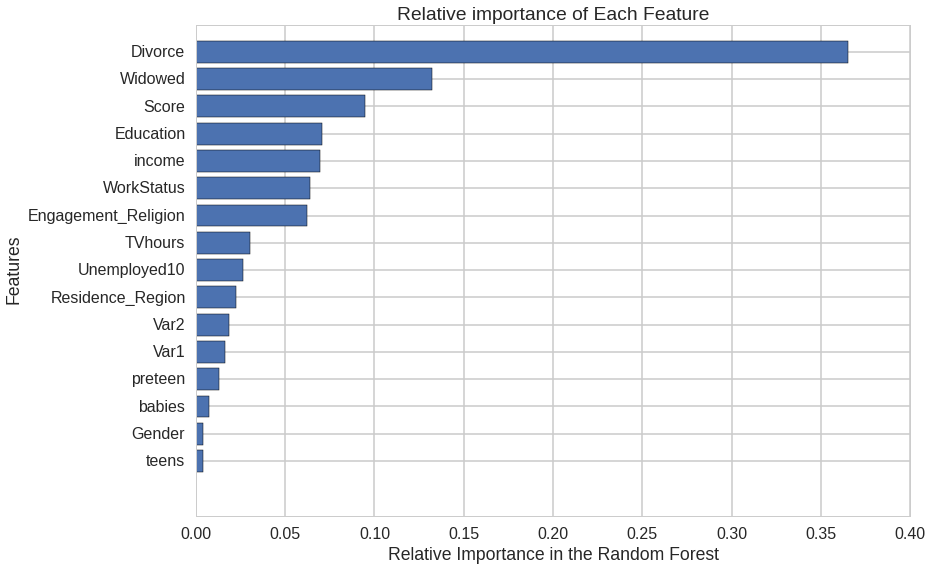

In [1225]:
importance_list = rf.feature_importances_
name_list = dfsurvey[cols_we_want].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show();

## Ada Boost Classifier

In [1226]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier(rf)

parameters = {"n_estimators": [3, 5, 8]}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, dfsurvey, cols_we_want, train_labels, 
                                                   mask=surveymask, score_func=eval_metric, n_jobs=-1)

using mask


/home/abhishek/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 3} 0.616360877362 [mean: 0.61636, std: 0.00494, params: {'n_estimators': 3}, mean: 0.61591, std: 0.00620, params: {'n_estimators': 5}, mean: 0.61397, std: 0.00743, params: {'n_estimators': 8}]
############# based on custom eval metric ################
Evaluation on training data: 0.6307
Evaluation on test data:     0.6212
[[  67  877    0]
 [  43 1732    0]
 [   4  385    0]]
########################################################


## Gradient Boosting Classifier

In [991]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {"n_estimators": [20, 25, 30], "max_depth": [1, 2, 3, 4]}
gbc, Xtrain, ytrain, Xtest, ytest = do_classify(gbc, parameters, dfsurvey, cols_we_want, train_labels, 
                                                   mask=surveymask, score_func=eval_metric, n_jobs=-1)

using mask


/home/abhishek/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 20, 'max_depth': 1} 0.619506138778 [mean: 0.61951, std: 0.00021, params: {'n_estimators': 20, 'max_depth': 1}, mean: 0.61951, std: 0.00021, params: {'n_estimators': 25, 'max_depth': 1}, mean: 0.61951, std: 0.00021, params: {'n_estimators': 30, 'max_depth': 1}, mean: 0.61942, std: 0.00039, params: {'n_estimators': 20, 'max_depth': 2}, mean: 0.61916, std: 0.00058, params: {'n_estimators': 25, 'max_depth': 2}, mean: 0.61871, std: 0.00135, params: {'n_estimators': 30, 'max_depth': 2}, mean: 0.61806, std: 0.00072, params: {'n_estimators': 20, 'max_depth': 3}, mean: 0.61753, std: 0.00110, params: {'n_estimators': 25, 'max_depth': 3}, mean: 0.61766, std: 0.00242, params: {'n_estimators': 30, 'max_depth': 3}, mean: 0.61647, std: 0.00378, params: {'n_estimators': 20, 'max_depth': 4}, mean: 0.61582, std: 0.00418, params: {'n_estimators': 25, 'max_depth': 4}, mean: 0.61586, std: 0.00528, params: {'n_estimators': 30, 'max_depth': 4}]
############# based on custom eval metric 

## Extreme Gradient Boosting

In [73]:
import xgboost as xgb

In [87]:
# Building a xgboost model

params = {}

params['silent'] = 1
params['objective'] = 'multi:softmax'
params['eta'] = 0.1
params['num_class'] = 3
params['subsample'] = 0.8
params['colsample_bytree'] = 0.8

plst = list(params.items())

offset = 7000

num_rounds = 30
xgtest = xgb.DMatrix(test)

# Create train and validation matrices
xgtrain = xgb.DMatrix(train[:offset, :], label=train_labels[:offset])
xgval = xgb.DMatrix(train[offset:, :], label=train_labels[offset:])

# Train
evallist = [(xgtrain, 'train'), (xgval, 'val')]
model = xgb.train(plst, xgtrain, num_rounds, evallist, feval=score_xgb)

[0]	train-custom_score:0.712571	val-custom_score:0.672803
[1]	train-custom_score:0.720857	val-custom_score:0.678314
[2]	train-custom_score:0.724400	val-custom_score:0.691183
[3]	train-custom_score:0.726086	val-custom_score:0.697111
[4]	train-custom_score:0.727171	val-custom_score:0.690229
[5]	train-custom_score:0.730214	val-custom_score:0.692017
[6]	train-custom_score:0.731229	val-custom_score:0.693774
[7]	train-custom_score:0.733886	val-custom_score:0.694400
[8]	train-custom_score:0.731329	val-custom_score:0.693089
[9]	train-custom_score:0.731929	val-custom_score:0.695055
[10]	train-custom_score:0.732414	val-custom_score:0.692553
[11]	train-custom_score:0.733071	val-custom_score:0.692523
[12]	train-custom_score:0.730314	val-custom_score:0.694191
[13]	train-custom_score:0.731114	val-custom_score:0.696217
[14]	train-custom_score:0.733271	val-custom_score:0.694847
[15]	train-custom_score:0.734114	val-custom_score:0.694519
[16]	train-custom_score:0.733886	val-custom_score:0.694549
[17]	tr

In [88]:
train_data = xgb.DMatrix(train, label=train_labels)

In [89]:
bst = xgb.train(plst, train_data, num_rounds)
xgb_preds = bst.predict(xgtest)

In [91]:
preds_labels = inverse_mapping_func(xgb_preds)

In [92]:
create_submission_file('./xgboost_tuned.csv', dfsurvey_test.ID.values, preds_labels)

## Training

In [1227]:
# train on the balanced set
#rf.fit(dfsurvey[cols_we_want], train_labels)
clfAda.fit(dfsurvey[cols_we_want], train_labels)
# log.fit(dfsurvey[cols_we_want], train_labels)
# gbc.fit(dfsurvey[cols_we_want], train_labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=3, random_state=None)

In [1228]:
ada_preds = clfAda.predict(dfsurvey_test[cols_we_want])
#rf_preds = rf.predict(dfsurvey_test[cols_we_want])
# log_preds = log.predict_proba(dfsurvey[cols_we_want])
# gbc_preds = gbc.predict_proba(dfsurvey[cols_we_want])

In [1232]:
ada_preds_labels = inverse_mapping_func(ada_preds)

In [1234]:
create_submission_file('./ada_with_rf_base.csv', dfsurvey_test.ID.values, ada_preds_labels)